# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [3]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

array([[<Axes: title={'center': 'Well'}>,
        <Axes: title={'center': 'Por'}>,
        <Axes: title={'center': 'Perm'}>],
       [<Axes: title={'center': 'AI'}>,
        <Axes: title={'center': 'Brittle'}>,
        <Axes: title={'center': 'TOC'}>],
       [<Axes: title={'center': 'VR'}>, <Axes: title={'center': 'Prod'}>,
        <Axes: >]], dtype=object)

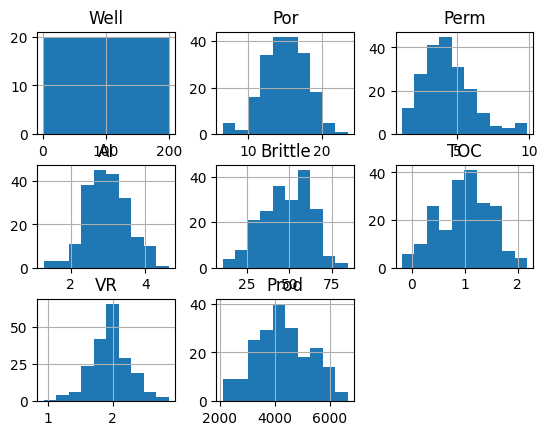

In [5]:
data.hist()

<Axes: >

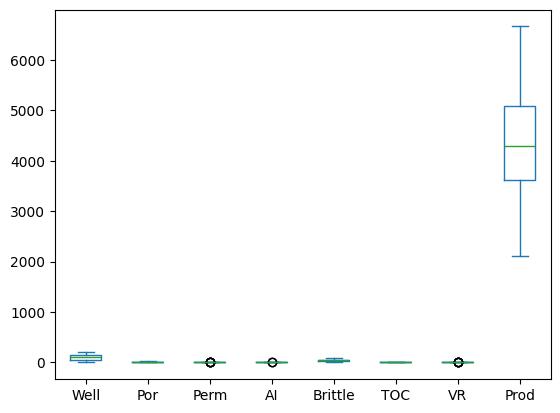

In [6]:
data.loc[:,].plot.box()

<Axes: >

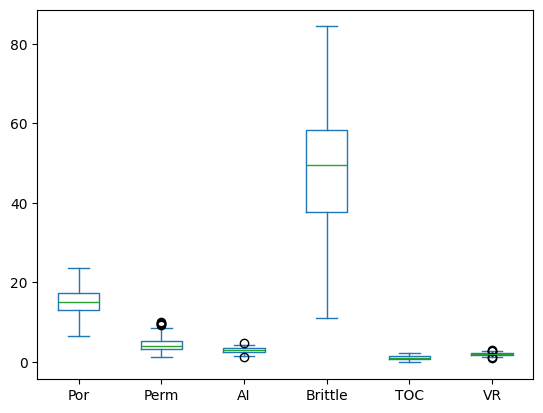

In [7]:
data.loc[:,data.drop(columns=['Well', 'Prod']).columns].plot.box()

<Axes: >

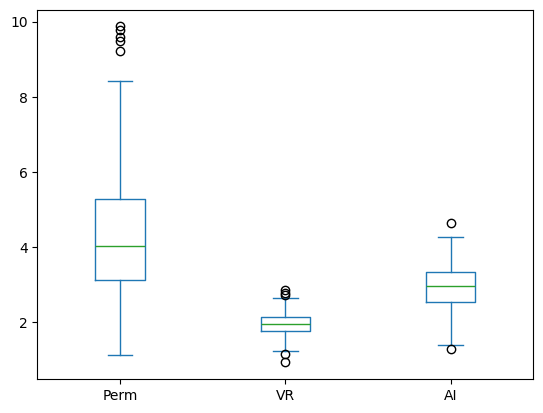

In [8]:
data.loc[:,['Perm','VR','AI']].plot.box()

Index(['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'], dtype='object')


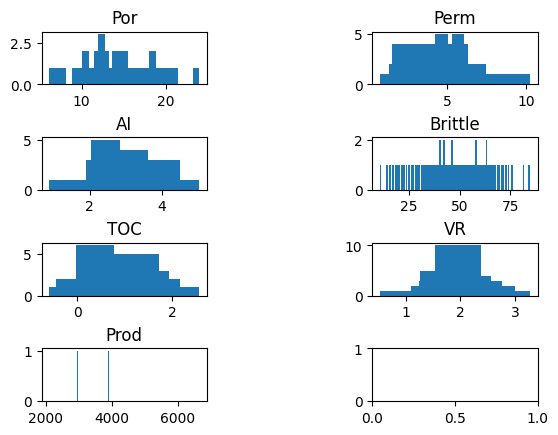

In [9]:
fig, ax = plt.subplots(4,2)
fig.subplots_adjust(wspace=1, hspace=1)

cols = data.columns[1:]
print(cols)
for i in range(len(cols)):
    ax[i//2][i%2].bar(data[cols[i]].value_counts().index, data[cols[i]].value_counts().values)
    ax[i//2][i%2].set_title(cols[i])

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [10]:
# Подсчет матрицы корреляции

# Ф-ия подсчета корреляции Пирсона, возвращающая значение корреляции между a,b
def f_corr(a,b) -> float:
    #ковариация
    cov = np.cov(np.vstack([a.values,b.values]))
    
    #СКО a и СКО b
    std_a = np.std(a.values)
    std_b = np.std(b.values)

    return cov[0][1]/(std_a*std_b)

# Столбцы data
cols = data.columns

# Создаем датафрейм для матрицы корреляций
corr_data = pd.DataFrame(data = np.array([[-2 for i in range(len(data.columns))] for j in range(len(data.columns))]),
                            index = data.columns,
                            columns = data.columns)

# Подсчет корреляции для data
for i in range(len(cols)):
    for j in range(i, len(cols)):
        corr_data.loc[cols[i], cols[j]] = corr_data.loc[cols[j], cols[i]] = f_corr(data[cols[i]], data[cols[j]])

In [11]:
# Определитель матрицы корреляций
print(f"det(corr_data) = {np.linalg.det(corr_data)}")

det(corr_data) = 0.0007598044059406939


In [12]:
# Ранг матрицы корреляций
print(f"rank(corr_data) = {np.linalg.matrix_rank(corr_data)}")

rank(corr_data) = 8


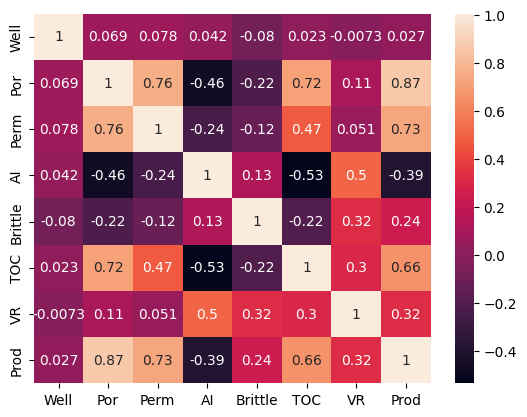

In [13]:
# Вывод heatmap из seaborn
ax = sns.heatmap(corr_data, annot=True)
plt.show()

* Какие факторы сильнее всего коррелируют с целевой переменной?
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?



 **Выводы:**
* Признаки Por, Perm, Toc сильно коррелируют с целевой переменной(Prod). В то же время AI, Brittle и VR имеют корреляцю > 0.24, что тоже неплохой показатель.
* Определитель близок к нулю, поэтому корреляционная матрица является плохо обсуловленной.
* Также взяв во внимание плохую обсуловленность корреляционной матрицы и взглянув на тепловую карту матрицы можно заметить мультиколлинеарность в данных. Чистой коллинеарности нет, потому что ранг матрицы = количеству признаков и нет корреляции между признаками, равной по модулю один.
* Так как чистой коллинеарности нет, то мы можем использовать классическую модель линейной регрессии, потому что не будет существовать бесконечное количество способов выразить один фактор через линейную комбинацию других. Однако присутствует сильная мультиколлинеарность, поэтому интерпретируемость коэффициентов линейной регрессии остается под вопросом.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Создаем матрицу наблюдений и вектор правильных ответов
X = data.drop(columns=['Prod']).values
y = data.Prod.values

# Проверяем
X.shape

(200, 7)

In [15]:
# МНК
w = np.linalg.inv(X.T@X)@X.T@y

In [16]:
w

array([-4.34496006e-02,  1.84616889e+02,  1.57557782e+02, -6.75731071e+02,
        1.95274209e+01, -2.72983826e+02,  1.12470546e+03])

In [17]:
# Округление
w = (np.round(w)).astype(int)

In [18]:
w

array([   0,  185,  158, -676,   20, -273, 1125])

**Выводы:**
* Признак Well является шумом, т.к. его округленный коэффициент равен 0 и не оказывает влияние на целевую переменную.
* Признак VR больше всего влияет на целевую переменную по модулю: если коэффициент отражения витринита увеличится на 1%, то медианная добыча газа в сутки увеличится на 1125 (млн. кубических футов).
* Тот же признак Brittle по модулю меньше всех влияет на целевую переменную: если коэффициент хрупкости скважины увеличится на 1%, то медианная добыча газа в сутки увеличится всего на 20 (млн. кубических футов).

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [19]:
# Вектор параметров
A = np.array([106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])

# Предсказаление 
y_pred = A@w
y_pred

4670.09

In [20]:
# Абсолютная ошибка прогноза
abs(4748.315024 - y_pred)

78.2250240000003

In [21]:
# Прогноз для всех скважин
y_all = X@w

In [22]:
# Метрики: средняя квадратическая ошибка(MSE) и средняя абсолютная ошибка(MAE)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f"MSE: {mean_squared_error(y, y_all)} \nMAE: {mean_absolute_error(y, y_all)}")

MSE: 49913.15073848209 
MAE: 172.02973648


**Выводы:**
* MSE большая. Учитывая, что в задании 5.0 в визуализации ящиков с усами можно было наблюдать выбросы, то можно предположить, что метрика, чувствительная к выбросам, стала такой как раз по этой причине.
* Учитывая минимум в Prod ~2100 и медианное значение ~4300, то среднее отклонение предсказанных значений на порядок меньше значений в данных.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

W = [   0  185  158 -676   20 -273 1125]


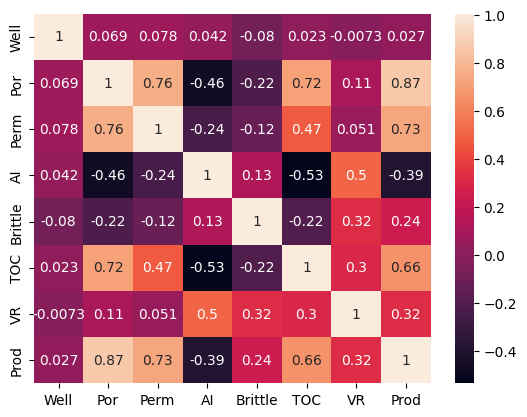

In [23]:
# Выводим для сравнения
print(f"W = {w}")
ax = sns.heatmap(corr_data, annot=True)
plt.show()

**Вывод**
* TOC имеет прямую зависимость в матрице корреляций и обратную в модели - противоречие.
* TOC имеет сильную корреляцию с Por, AI, а также умеренную с Perm - что является мультиколлинеарностью и может служить причиной противоречия.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

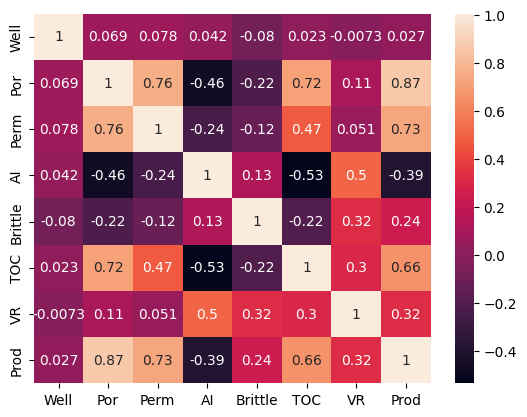

In [24]:
# Выводим матрицу корреляции
ax = sns.heatmap(corr_data, annot=True)
plt.show()

In [25]:
#Well имеет корреляцию с Prod меньше 0.05
corr_data.drop(columns=['Well'], index=['Well'], inplace=True)

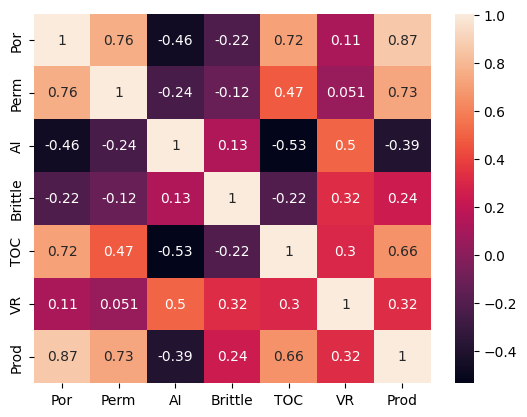

In [26]:
# Выводим матрицу корреляции
ax = sns.heatmap(corr_data, annot=True)
plt.show()

In [27]:
# TOC имеет корреляцию с Por больше 0.7 и меньше Por и Perm коррелирует с целевой переменной.
corr_data.drop(columns=['TOC'], index=['TOC'], inplace=True)

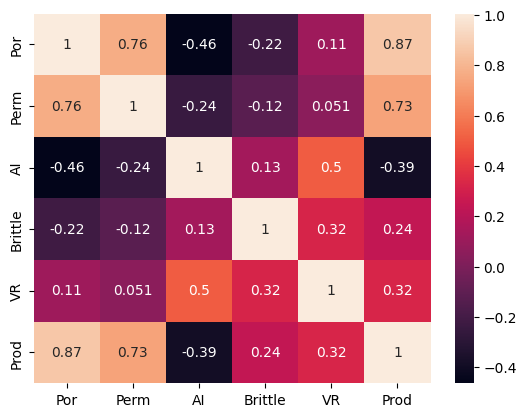

In [28]:
# Выводим матрицу корреляции
ax = sns.heatmap(corr_data, annot=True)
plt.show()

In [29]:
# Perm имеет корреляцию с Por больше 0.7 и меньше Por коррелирует с целевой переменной.
corr_data.drop(columns=['Perm'], index=['Perm'], inplace=True)

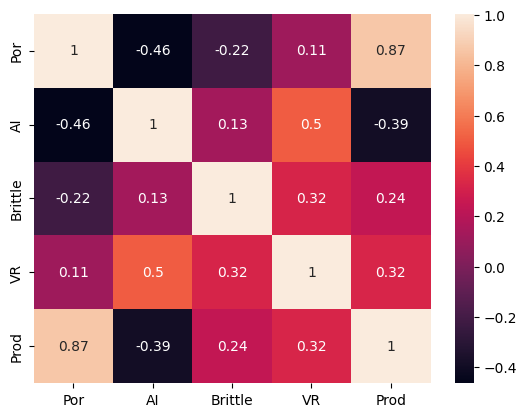

In [30]:
# Выводим матрицу корреляции
ax = sns.heatmap(corr_data, annot=True)
plt.show()

In [31]:
# Больше сильной мультиколлинеарности нет, поэтому убираем данные признаки из data и строим модель.
data_clear = data.drop(columns = ['Perm', 'TOC', 'Well'])

In [32]:
# Создаем матрицу наблюдений и вектор правильных ответов
X_clear = data_clear.drop(columns=['Prod']).values
y_clear = data_clear.Prod.values

# МНК + округление
w_clear = (np.round(np.linalg.inv(X_clear.T@X_clear)@X_clear.T@y_clear)).astype(int)
w_clear

array([ 235, -486,   22,  598])

In [33]:
np.linalg.lstsq(X_clear, y_clear, rcond=None)

(array([ 235.18136665, -486.00139708,   22.19245125,  598.12844353]),
 array([16344773.0963774]),
 4,
 array([739.51642596,  77.03212632,  11.70433157,   2.82722016]))

In [34]:
# Прогноз для всех скважин
y_pred_clear = X_clear@w_clear

# Метрики
print(f"MSE: {mean_squared_error(y_clear, y_pred_clear)} \nMAE: {mean_absolute_error(y_clear, y_pred_clear)}")

MSE: 81880.66338842918 
MAE: 216.5463179


**Выводы**
* Ожидалось, что после удаления признаков метрики станут лучше, хотя все оказалось наоборот.
* В итоге модель потеряла точность и причина скорее всего в том, что после удаления признаков модели не хватает данных.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [35]:
# LinerRegression из sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Вычисляем коэффициенты регрессии
model.fit(X_clear, y_clear)
print(f"w_sklearn: {(np.round(model.coef_)).astype(int)}\nw_ours: {w_clear}")

w_sklearn: [ 293 -200   28  517]
w_ours: [ 235 -486   22  598]


In [36]:
# Предсказываем 
y_sklearn_pred = model.predict(X_clear)
# Метрики
print(f"MSE: {mean_squared_error(y_clear, y_sklearn_pred)} \nMAE: {mean_absolute_error(y_clear, y_sklearn_pred)}")

MSE: 53660.854579235325 
MAE: 171.4314605958078


In [37]:
# Сохранение метрик для итоговой таблицы
lr_nonpoly_mae = mean_absolute_error(y_clear, y_sklearn_pred)

**Выводы**
* Коэффициенты библиотечной реализации модели совпадают с раннее подсчитанными коэффициентами
* Метрики предсказанных значений библиотечной реализации модели не совпадают с метриками раннее предсказанных значений.
* Причиной отличия значений метрик является гиперпараметр fit_intercept=True, которое позволяет линии быть приближеннее к данным из-за отсутствия привязки к Y=0 и также скорее всего присутствует разность округлений(небольшое отличие неокругленных коэффициентов при подсчете внутри модели).

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [38]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [39]:
# Стандартизируем признаки
num_cols = data_clear.drop(columns = ['Prod']).columns
scaler = StandardScaler()
data_clear[num_cols] = scaler.fit_transform(data_clear[num_cols])
data_clear

,Por,AI,Brittle,VR,Prod
0,-0.982256,-0.298603,2.358297,1.152048,4165.196191
1,-0.881032,0.444147,-0.141332,-0.280931,3561.146205
2,-0.327677,1.841224,1.748113,2.518377,4284.348574
3,0.903875,-0.599240,-0.592585,-0.280931,5098.680869
4,0.853263,0.373409,-2.640962,-0.214280,3406.132832
...,...,...,...,...,...
195,-1.026119,0.002034,1.349364,0.318921,3847.571003
196,1.011847,0.727099,-0.272593,0.385571,5601.227131
197,-0.968759,0.974682,0.632042,-0.780807,3409.575363
198,0.188562,-0.864508,0.715765,1.285349,5087.592149


In [40]:
# Генерация полиномиальных признаков.
X = data_clear[num_cols]
y = data_clear['Prod']
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
print(f"Количество факторов: {X_poly[:, 1:].shape[1]}")

Количество факторов: 33


In [41]:
# Линейная регрессия через R2 score в кросс валидации.
model = LinearRegression()
scores = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)

lr_train_mae = -(scores['train_score'].sum())/5
lr_test_mae = -(scores['test_score'].sum())/5

print(f"Среднее train MAE: {lr_train_mae}")
print(f"Среднее test MAE: {lr_test_mae}")

Среднее train MAE: 75.34530982164883
Среднее test MAE: 110.47360945494015


**Выводы**
* MAE улучшилось при использовании полиномиальных признаков.
* Таким образом можно сказать, что данные сложнее, чем прямая линия.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [42]:
# Задаем альфа для перебора гиперпараметров
alphas = np.arange(0.01, 5, 0.05)
param = {'alpha' :alphas}

# Модель L1
model = Lasso()

# Перебор гиперпараметров и кросс валидация через GridSearchCV
grid_search_l1 = GridSearchCV(model, param_grid=param, cv=5, 
                              scoring='neg_mean_absolute_error', return_train_score=True)

X_poly = scaler.fit_transform(X_poly)
grid_search_l1.fit(X_poly, y)

# Сохранение метрик и показателя лучшего параметра для итоговой таблицы
l1_train_mae = -np.max(grid_search_l1.cv_results_['mean_train_score'])
l1_test_mae = -np.max(grid_search_l1.cv_results_['mean_test_score'])
l1_params = grid_search_l1.best_params_['alpha']

print(f"Лучшее train MAE: {l1_train_mae}")
print(f"Лучшее test MAE: {l1_test_mae}")
print(f"Лучшее альфа: {l1_params}")

Лучшее train MAE: 75.25137321075553
Лучшее test MAE: 94.12604262379362
Лучшее альфа: 3.81


**Выводы**
* train MAE практически не изменилось, хотя test MAE уменьшилось больше чем на 15.
* L1 регуляризация успешно предотвращает переобучение модели.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [43]:
# Модель L2
model = Ridge()

# Перебор гиперпараметров и кросс валидация через GridSearchCV
grid_search_l2 = GridSearchCV(model, param_grid=param, cv=5, 
                              scoring='neg_mean_absolute_error', return_train_score=True)

X_poly = scaler.fit_transform(X_poly)
grid_search_l2.fit(X_poly, y)

# Сохранение метрик и показателя лучшего параметра для итоговой таблицы
l2_train_mae = -np.max(grid_search_l2.cv_results_['mean_train_score'])
l2_test_mae = -np.max(grid_search_l2.cv_results_['mean_test_score'])
l2_params = grid_search_l2.best_params_['alpha']

print(f"Лучшее train MAE: {l2_train_mae}")
print(f"Лучшее test MAE: {l2_test_mae}")
print(f"Лучшее альфа: {l2_params}")

Лучшее train MAE: 75.29950390180394
Лучшее test MAE: 108.4661480024683
Лучшее альфа: 0.7100000000000001


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

**Выводы**
* L2 регуляризация показала MAE хуже L1 регуляризации.
* Можно предположить, что для увеличения качества модели необходимо занулять веса, раз L1 регуляризация намного лучше L2 регуляризации.

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Задаем l1_ratio для комбинирования
ratios = np.arange(0, 1.1, 0.1)
param['l1_ratio'] = ratios

# Комбинирование L1 и L2 регуляризаций
model = ElasticNet()

# Перебор гиперпараметров и кросс валидация через GridSearchCV для метрики MAE
grid_search_elastic_mae = GridSearchCV(model, param_grid=param, cv=5, 
                              scoring='neg_mean_absolute_error', return_train_score=True)

# Стандартизация
X_poly = scaler.fit_transform(X_poly)
grid_search_elastic_mae.fit(X_poly, y)

en_train_mae = -np.max(grid_search_elastic_mae.cv_results_['mean_train_score'])
en_test_mae = -np.max(grid_search_elastic_mae.cv_results_['mean_test_score'])
en_params_mae = grid_search_elastic_mae.best_params_

# Сохранение метрик и показателя лучшего параметра для итоговой таблицы
print(f"Лучшее train MAE: {en_train_mae}")
print(f"Лучшее test MAE: {en_test_mae}")
print(f"Лучшие параметры: {en_params_mae}")
print()

# Перебор гиперпараметров и кросс валидация через GridSearchCV для метрики MAPE
grid_search_elastic_mape = GridSearchCV(model, param_grid=param, cv=5, 
                              scoring='neg_mean_absolute_percentage_error', return_train_score=True)

# Стандартизация
X_poly = scaler.fit_transform(X_poly)
grid_search_elastic_mape.fit(X_poly, y)

# Сохранение метрик и показателя лучшего параметра для итоговой таблицы
en_train_mape = -np.max(grid_search_elastic_mape.cv_results_['mean_train_score'])
en_test_mape = -np.max(grid_search_elastic_mape.cv_results_['mean_test_score'])
en_params_mape = grid_search_elastic_mape.best_params_

print(f"Лучшее train MAPE: {en_train_mape}")
print(f"Лучшее test MAPE: {en_test_mape}")
print(f"Лучшие параметры: {en_params_mape}")

Лучшее train MAE: 75.25137321075552
Лучшее test MAE: 94.12604262379362
Лучшие параметры: {'alpha': 3.81, 'l1_ratio': 1.0}



**Вывод**
* Комбинирование L1 и L2 регуляризаций привело к L1 регуляризации - лучшей и для метрики MAE, и для метрики MAPE.
* Смотря на MAPE, ошибка на тестовых данных составила 0.02 процента от фактического значения. Это можно объяснить использованием тестируемых данных как данных для обучения.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# data для таблицы результатов
df_data = {'Модель': ['LinearRegression', 'LinearRegression', 'Lasso', 'Ridge', 'ElasticNet'],
           'Гиперпараметры': ['', '', l1_params, l2_params, [en_params_mae, en_params_mape]],
           'Полиномиальные признаки': [False, True, True, True, True], 
           'MAE train': [lr_nonpoly_mae, lr_train_mae, l1_train_mae, l2_train_mae, en_train_mae],
           'MAE test': ['', lr_test_mae, l1_test_mae, l2_test_mae, en_test_mae],
           'MAPE train': ['', '', '', '', en_train_mape],
           'MAPE test': ['', '', '', '', en_test_mape]}

df = pd.DataFrame(data = df_data)
df

**Вывод**
* По таблице можно увидеть, что наилучший результат показал Lasso. Даже при комбинации L1 и L2 регуляризации подбор гиперпараметров вышел на чистое L1.
* MAE на тренировочных фолдах примерно одинакова среди всех моделей, использующих полиномиальные признаки.
* В итоге с помощью регуляризации и полиномиальных признаков получилось уменьшить MAE train более чем в два раза и с точки зрения переобученности L1 регуляризация улучшила качество модели.